20180304

In [1]:
import pickle
from Vision.TwoLayer import TwoLayerNet
from Vision.util import *
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
test = np.array([[1,2],[3,4]])
np.sum(test,axis=0)

array([4, 6])

In [3]:
from Vision.Layers import *
from sklearn import datasets
from PIL import Image
from collections import OrderedDict

In [4]:
#取出資料集
def load_data(size):
    mnist = datasets.fetch_mldata('MNIST original')
    s = mnist.data.shape[0]
    c = np.zeros(s)
    c[np.random.choice(s,size,replace=False)] = 1
    #n_train = size
    data_train = mnist.data[c==1]
    target_train = mnist.target[c==1]
    data_test = mnist.data[c==0]
    target_test = mnist.target[c==0]
    return (data_train.astype(np.float32), target_train.astype(np.float32),data_test.astype(np.float32), target_test.astype(np.float32))


In [5]:
(x_train,t_train,x_test,t_test) = load_data(20000)

In [6]:
def one_hot_label(y,size):
    a = np.zeros([y.shape[0],size])
    for i in range(y.shape[0]):
        a[i,int(y[i])] = 1
    #t = y.astype(np.int)
    #a[:,t] = 1
    return a

In [7]:
t_train_2 = one_hot_label(t_train,10)
x_train_2 = x_train / 255
t_train_2[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
class Model:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(W = self.params['W1'],b=self.params['b1'])
        self.layers['ReLU1'] = ReLU()
        self.layers['Affine2'] = Affine(W = self.params['W2'],b=self.params['b2'])
        #self.layers['ReLU2'] = Vision.Layers.ReLU()
        self.last_layers = SoftmaxWithLoss()
        
    def predict(self,x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = self.last_layers.forward(y,t)
        return loss
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        if t.ndim != 1:
            t = np.argmax(t,axis=1)
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def grads(self,x,t):
        loss = self.loss(x,t)
        dout = self.last_layers.backward()
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        return grads
            
            
        

In [9]:
model = Model(28*28,100,10)
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size/batch_size,1)
optimizer = SGD(learning_rate)

(784, 100)
++
(100, 10)
++


train acc, test acc | 0.121400 , 0.120100
train acc, test acc | 0.856950 , 0.858800
train acc, test acc | 0.891900 , 0.892140
train acc, test acc | 0.909850 , 0.906420
train acc, test acc | 0.914850 , 0.909400
train acc, test acc | 0.923050 , 0.917160
train acc, test acc | 0.931200 , 0.923740
train acc, test acc | 0.936250 , 0.927240
train acc, test acc | 0.940750 , 0.930220
train acc, test acc | 0.946200 , 0.934920
train acc, test acc | 0.948950 , 0.935880
train acc, test acc | 0.952400 , 0.938800
train acc, test acc | 0.955450 , 0.940280
train acc, test acc | 0.957750 , 0.942820
train acc, test acc | 0.960850 , 0.944000
train acc, test acc | 0.962850 , 0.945980
train acc, test acc | 0.964300 , 0.946900
train acc, test acc | 0.968000 , 0.949460
train acc, test acc | 0.968900 , 0.948500
train acc, test acc | 0.971400 , 0.951000
train acc, test acc | 0.971750 , 0.950780
train acc, test acc | 0.973600 , 0.951180
train acc, test acc | 0.974250 , 0.951160
train acc, test acc | 0.977650 , 0

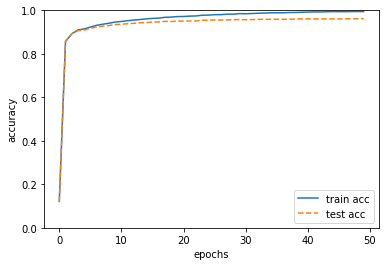

In [10]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train_2[batch_mask]
    t_batch = t_train_2[batch_mask]
    grad = model.grads(x_batch,t_batch)
    optimizer.update(model.params,grad)
    #for key in ('W1','b1','W2','b2'):
    #    model.params[key] -= learning_rate * grad[key]
    #更新參數後的誤差
    loss = model.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = model.accuracy(x_train_2,t_train_2)
        test_acc = model.accuracy(x_test/255,one_hot_label(t_test,10))
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | %f , %f"%(train_acc,test_acc) )

#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/train_neuralnet.py
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

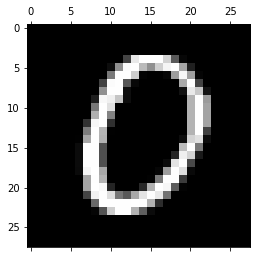

0
0


In [11]:
def show(index):
    plt.matshow(np.uint8(x_test[index]).reshape(28,28), cmap=plt.cm.gray)
    plt.show()
    print(int(t_test[index]))
    print(np.argmax(model.predict(x_test[index]/255)))
show(1234)

##  卷積層

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
x = np.random.rand(10,1,28,28)
x.shape

(10, 1, 28, 28)

In [5]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/common/util.py
test = np.array([[1,2],[3,4]])
test

array([[1, 2],
       [3, 4]])

In [13]:
pad = 1
np.pad(test,[(0,0), (0,0)],'constant')

array([[1, 2],
       [3, 4]])

In [9]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    input_data : (批次數,色塊,高,寬)
    filter_h : 高
    filter_w : 寬
    stride : 步幅
    pad : 填補
    
    Returns
    -------
    col : 回傳2維
    """
    N, C, H, W = input_data.shape
    #算出輸出高度
    out_h = (H + 2*pad - filter_h)//stride + 1
    #算出輸出寬度
    out_w = (W + 2*pad - filter_w)//stride + 1
    #'constant' 表示都補上0
    # 前兩個不針對批次數與色塊補值
    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    # 建立輸出用
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [10]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    col :
    input_shape : 入力データの形状（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad
    Returns
    -------
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [11]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/common/layers.py
from Vision.Layers import *
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        #print(x.shape)
        #print(self.W.shape)
        N, C, H, W = x.shape

        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

In [12]:
from Vision.Layers import *
class SimpleCovNet:
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = ReLU()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = ReLU()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()


    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

train acc, test acc | 0.094050 , 0.098860
train acc, test acc | 0.731600 , 0.732120
train acc, test acc | 0.916400 , 0.913000
train acc, test acc | 0.938600 , 0.931620
train acc, test acc | 0.948050 , 0.940820
train acc, test acc | 0.958450 , 0.951280
train acc, test acc | 0.965750 , 0.956060
train acc, test acc | 0.970350 , 0.960120
train acc, test acc | 0.976400 , 0.964680
train acc, test acc | 0.972100 , 0.962800
train acc, test acc | 0.980150 , 0.967940
train acc, test acc | 0.984950 , 0.971940
train acc, test acc | 0.987100 , 0.973360
train acc, test acc | 0.987900 , 0.973080
train acc, test acc | 0.987850 , 0.973160
train acc, test acc | 0.991400 , 0.975080
train acc, test acc | 0.990750 , 0.973460
train acc, test acc | 0.993000 , 0.976700
train acc, test acc | 0.994550 , 0.976600
train acc, test acc | 0.995300 , 0.976360
train acc, test acc | 0.996350 , 0.977900
train acc, test acc | 0.995600 , 0.976560
train acc, test acc | 0.996600 , 0.977100
train acc, test acc | 0.996650 , 0

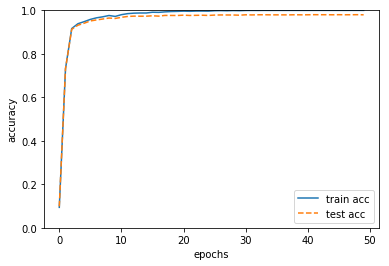

In [13]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
model2 = SimpleCovNet()
iters_num = 20000
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size/batch_size,1)
optimizer = SGD(learning_rate)
for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train_2[batch_mask].reshape(-1,1,28,28)
    #print("batch")
    #print(x_batch.shape)
    t_batch = t_train_2[batch_mask]
    grad = model2.gradient(x_batch,t_batch)
    optimizer.update(model2.params,grad)
    #for key in ('W1','b1','W2','b2'):
    #    model.params[key] -= learning_rate * grad[key]
    #更新參數後的誤差
    loss = model2.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = model2.accuracy(x_train_2.reshape(-1,1,28,28),t_train_2)
        test_acc = model2.accuracy((x_test/255).reshape(-1,1,28,28),one_hot_label(t_test,10))
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | %f , %f"%(train_acc,test_acc) )

#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/train_neuralnet.py
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [14]:
model2.save_params()

In [21]:
model2.layers['Conv1'].W[0].shape

(1, 5, 5)

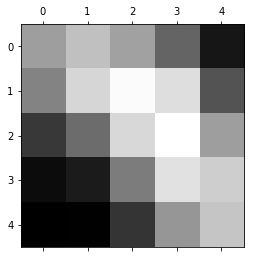

In [33]:

plt.matshow(np.squeeze(model2.layers['Conv1'].W[7],axis=0), cmap=plt.cm.gray)
plt.show()

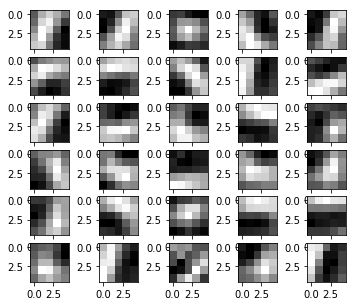

In [38]:
fig=plt.figure(figsize=(6, 5))
columns = 5
rows = 6
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    #plt.imshow(img)
    plt.imshow(np.squeeze(model2.layers['Conv1'].W[i-1],axis=0), cmap=plt.cm.gray)
    #plt.imshow(model2.layers['Conv1'].W[i-1])
plt.show()